## THEORY

1. Explain the concept of batch normalization in the context of Artificial Neural Networks.

Batch normalization is a technique used in training artificial neural networks to improve convergence speed, stability, and generalization. It aims to address the problem of internal covariate shift, which refers to the change in the distribution of a layer's inputs during training. This shift can slow down training and require lower learning rates to maintain stability.

In the context of artificial neural networks, batch normalization involves normalizing the inputs of a neural network layer by adjusting and scaling them. This normalization is done over a mini-batch of training examples rather than individual data points. The main idea is to ensure that the inputs to each layer have a consistent distribution throughout the training process, which can lead to more stable and faster training

1. Normalization: For each feature (neuron activation) in the mini-batch, calculate the mean and standard deviation. Then, normalize the feature by subtracting the mean and dividing by the standard deviation. This centers the data around zero and scales it to have unit variance.

2. Scaling and Shifting: After normalization, the data might lose some of its representational power. To counteract this, batch normalization introduces two learnable parameters, gamma (scaling) and beta (shifting). These parameters allow the network to learn how to scale and shift the normalized values, effectively allowing the network to decide whether to use the normalized values or revert to the original values.





2. Describe the benefits of using batch normalization during training.

The benefits of batch normalization include:

1. Faster Convergence: By reducing internal covariate shift, batch normalization allows for higher learning rates, leading to faster convergence of the training process.

2. Stability: Batch normalization adds a level of robustness to the training process, making the network less sensitive to initialization and hyperparameter choices.

3. Regularization: Batch normalization has a slight regularization effect, reducing the need for dropout or other regularization techniques.

4. Gradient Flow: Batch normalization can help maintain a healthy gradient flow through the network, which mitigates vanishing and exploding gradient issues.

5. Reduced Dependency on Initialization: Networks with batch normalization are less dependent on careful weight initialization, making it easier to train deep networks.

3. Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.

**1. Normalization Step:**

Batch normalization operates on a mini-batch of data during training. Let's consider a specific layer in a neural network and a single feature (neuron activation) within that layer. The steps involved in the normalization process are as follows:

- **Calculate Mean and Variance:** For the selected feature, calculate the mean and variance over the mini-batch of data. These statistics represent how the feature behaves within the current batch.

- **Normalize:** Subtract the mean from each element in the feature and then divide by the standard deviation. This centers the data around zero and scales it to have unit variance. The normalized feature is given by:
  
  ![Normalized Feature Formula](https://latex.codecogs.com/png.latex?%5Ctext%7BNorm%7D%28x%29%20%3D%20%5Cfrac%7Bx%20-%20%5Cmu%7D%7B%5Csqrt%7B%5Csigma%5E2%20+%20%5Cepsilon%7D%7D)
  
  Where:
  - \(x\) is the original input.
  - \(\mu\) is the mean of the mini-batch.
  - \(\sigma\) is the standard deviation of the mini-batch.
  - \(\epsilon\) is a small constant added to the denominator for numerical stability.

**2. Learnable Parameters:**

Batch normalization introduces two learnable parameters for each feature in a layer:

- **Scaling (γ):** This parameter allows the network to learn how to scale the normalized values. It's a multiplicative factor applied to the normalized feature. If the feature benefits from being amplified or attenuated, the network can learn the appropriate scaling.

- **Shifting (β):** This parameter allows the network to learn how to shift the normalized values. It's an additive factor applied after scaling. This is important because normalization might shift the data away from the optimal region for the activation function, so shifting helps retain representational power.

**Working Together:**

The normalized feature is then scaled by (γ) and shifted by (β):

Output = gamma *Norm (x) + beta

This process allows the network to learn when to retain the normalized values (using \(γ\) and \(β\)) or revert to the original values (when \(γ = 1\) and \(β = 0\)).

**Benefits:**

- **Covariate Shift Mitigation:** The normalization step helps maintain a consistent distribution of inputs throughout training, which stabilizes and speeds up learning.

- **Learnable Parameters:** The learnable parameters \(γ\) and \(β\) provide flexibility, allowing the network to decide when normalization is beneficial and when to rely on original values.

- **Regularization:** The noise introduced by normalization can act as a form of regularization, reducing the need for dropout or other techniques.

## IMPLEMENTATION

1. Choose a dataset of your choice (e.g., MNIST, CIfAR-0) and preprocess itr
2. Implement a simple feedforward neural network using any deep learning framework/library (e.g.,Tensorlow, xyTorch)
3. Train the neural network on the chosen dataset without using batch normalizationr
4. Implement batch normalization layers in the neural network and train the model again.
5. Compare the training and validation performance (e.g., accuracy, loss) between the models with and without batch normalization.
6. Discuss the impact of batch normalization on the training process and the performance of the neural
network.

In [2]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 67.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 70.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 48.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 68.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 31.6 MB/s e

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Reshape the images to have a single channel (grayscale)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Split the dataset into training and validation sets
val_images = train_images[:5000]
val_labels = train_labels[:5000]
train_images = train_images[5000:]
train_labels = train_labels[5000:]

print("Number of training samples:", len(train_images))
print("Number of validation samples:", len(val_images))
print("Number of testing samples:", len(test_images))
print("Shape of images:", train_images[0].shape)
print("Shape of labels:", train_labels[0].shape)


2023-08-14 08:19:17.830213: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-14 08:19:17.902139: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-14 08:19:17.903385: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-14 08:19:19.248751: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


11490434/11490434 [==============================] - 2s 0us/step
Number of training samples: 55000
Number of validation samples: 5000
Number of testing samples: 10000
Shape of images: (28, 28, 1)
Shape of labels: (10,)


In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers

# Create a simple feedforward neural network model
model = models.Sequential()

# Add input layer (flatten the 28x28 images)
model.add(layers.Flatten(input_shape=(28, 28, 1)))

# Add hidden layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

# Add output layer (10 classes for digits 0-9)
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers

# Load and preprocess the MNIST dataset (same as before)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)
val_images = train_images[:5000]
val_labels = train_labels[:5000]
train_images = train_images[5000:]
train_labels = train_labels[5000:]

# Create a simple feedforward neural network model without batch normalization
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(val_images, val_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

Epoch 1/10
860/860 [==============================] - 4s 4ms/step - loss: 0.2943 - accuracy: 0.9155 - val_loss: 0.1536 - val_accuracy: 0.9560
Epoch 2/10
860/860 [==============================] - 3s 3ms/step - loss: 0.1274 - accuracy: 0.9610 - val_loss: 0.1055 - val_accuracy: 0.9710
Epoch 3/10
860/860 [==============================] - 3s 3ms/step - loss: 0.0874 - accuracy: 0.9736 - val_loss: 0.0864 - val_accuracy: 0.9760
Epoch 4/10
860/860 [==============================] - 3s 3ms/step - loss: 0.0649 - accuracy: 0.9801 - val_loss: 0.0870 - val_accuracy: 0.9734
Epoch 5/10
860/860 [==============================] - 3s 3ms/step - loss: 0.0512 - accuracy: 0.9834 - val_loss: 0.0835 - val_accuracy: 0.9744
Epoch 6/10
860/860 [==============================] - 3s 3ms/step - loss: 0.0406 - accuracy: 0.9865 - val_loss: 0.0702 - val_accuracy: 0.9804
Epoch 7/10
860/860 [==============================] - 3s 3ms/step - loss: 0.0326 - accuracy: 0.9896 - val_loss: 0.0739 - val_accuracy: 0.9812
Epoch 

In [6]:
import tensorflow as tf
from tensorflow.keras import models, layers

# Load and preprocess the MNIST dataset (same as before)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)
val_images = train_images[:5000]
val_labels = train_labels[:5000]
train_images = train_images[5000:]
train_labels = train_labels[5000:]

# Create a simple feedforward neural network model with batch normalization
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(val_images, val_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


Epoch 1/10
860/860 [==============================] - 5s 4ms/step - loss: 0.2625 - accuracy: 0.9276 - val_loss: 0.1110 - val_accuracy: 0.9684
Epoch 2/10
860/860 [==============================] - 3s 4ms/step - loss: 0.1023 - accuracy: 0.9696 - val_loss: 0.0943 - val_accuracy: 0.9724
Epoch 3/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0723 - accuracy: 0.9777 - val_loss: 0.0752 - val_accuracy: 0.9782
Epoch 4/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0547 - accuracy: 0.9828 - val_loss: 0.0808 - val_accuracy: 0.9770
Epoch 5/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0442 - accuracy: 0.9858 - val_loss: 0.0740 - val_accuracy: 0.9782
Epoch 6/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0372 - accuracy: 0.9883 - val_loss: 0.0766 - val_accuracy: 0.9764
Epoch 7/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0318 - accuracy: 0.9900 - val_loss: 0.0761 - val_accuracy: 0.9786
Epoch 

Epoch 1/10
860/860 [==============================] - 4s 4ms/step - loss: 0.2962 - accuracy: 0.9146 - val_loss: 0.1391 - val_accuracy: 0.9618
Epoch 2/10
860/860 [==============================] - 3s 3ms/step - loss: 0.1226 - accuracy: 0.9633 - val_loss: 0.1099 - val_accuracy: 0.9676
Epoch 3/10
860/860 [==============================] - 3s 3ms/step - loss: 0.0824 - accuracy: 0.9754 - val_loss: 0.0913 - val_accuracy: 0.9738
Epoch 4/10
860/860 [==============================] - 3s 3ms/step - loss: 0.0630 - accuracy: 0.9806 - val_loss: 0.0804 - val_accuracy: 0.9764
Epoch 5/10
860/860 [==============================] - 3s 3ms/step - loss: 0.0467 - accuracy: 0.9854 - val_loss: 0.0877 - val_accuracy: 0.9754
Epoch 6/10
860/860 [==============================] - 3s 3ms/step - loss: 0.0391 - accuracy: 0.9873 - val_loss: 0.0874 - val_accuracy: 0.9752
Epoch 7/10
860/860 [==============================] - 3s 3ms/step - loss: 0.0316 - accuracy: 0.9902 - val_loss: 0.0889 - val_accuracy: 0.9736
Epoch 

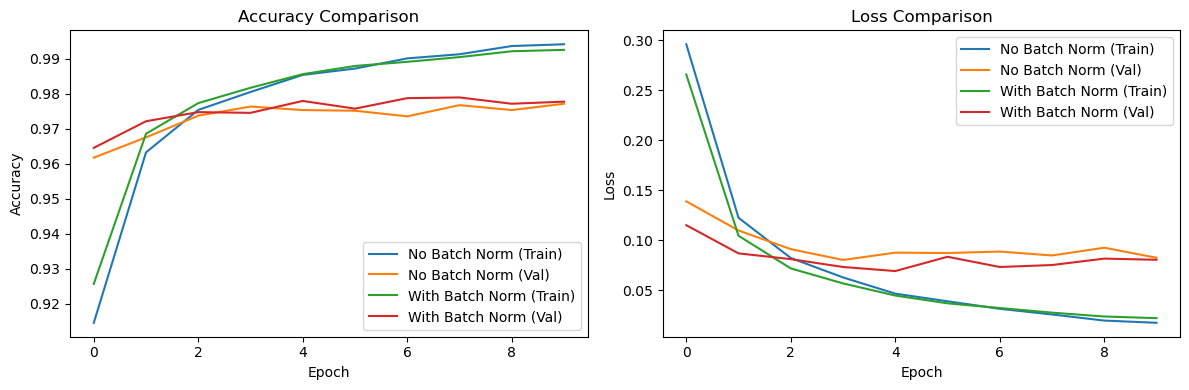

In [7]:
import matplotlib.pyplot as plt

# Train the model without batch normalization
model_no_bn = models.Sequential()
model_no_bn.add(layers.Flatten(input_shape=(28, 28, 1)))
model_no_bn.add(layers.Dense(128, activation='relu'))
model_no_bn.add(layers.Dense(64, activation='relu'))
model_no_bn.add(layers.Dense(10, activation='softmax'))
model_no_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_no_bn = model_no_bn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(val_images, val_labels))

# Train the model with batch normalization
model_with_bn = models.Sequential()
model_with_bn.add(layers.Flatten(input_shape=(28, 28, 1)))
model_with_bn.add(layers.Dense(128))
model_with_bn.add(layers.BatchNormalization())
model_with_bn.add(layers.Activation('relu'))
model_with_bn.add(layers.Dense(64))
model_with_bn.add(layers.BatchNormalization())
model_with_bn.add(layers.Activation('relu'))
model_with_bn.add(layers.Dense(10, activation='softmax'))
model_with_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_with_bn = model_with_bn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(val_images, val_labels))

# Plotting the comparison
plt.figure(figsize=(12, 4))

# Accuracy Comparison
plt.subplot(1, 2, 1)
plt.plot(history_no_bn.history['accuracy'], label='No Batch Norm (Train)')
plt.plot(history_no_bn.history['val_accuracy'], label='No Batch Norm (Val)')
plt.plot(history_with_bn.history['accuracy'], label='With Batch Norm (Train)')
plt.plot(history_with_bn.history['val_accuracy'], label='With Batch Norm (Val)')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Comparison
plt.subplot(1, 2, 2)
plt.plot(history_no_bn.history['loss'], label='No Batch Norm (Train)')
plt.plot(history_no_bn.history['val_loss'], label='No Batch Norm (Val)')
plt.plot(history_with_bn.history['loss'], label='With Batch Norm (Train)')
plt.plot(history_with_bn.history['val_loss'], label='With Batch Norm (Val)')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Experimentation and analysis

1.Experiment with different batch sizes and observe the effect on the training dynamics and model
performance.

2.Discuss the advantages and potential limitations of batch normalization in improving the training of
neural networks.

Epoch 1/10
3438/3438 [==============================] - 13s 3ms/step - loss: 0.2923 - accuracy: 0.9128 - val_loss: 0.1087 - val_accuracy: 0.9684
Epoch 2/10
3438/3438 [==============================] - 12s 3ms/step - loss: 0.1525 - accuracy: 0.9537 - val_loss: 0.0907 - val_accuracy: 0.9736
Epoch 3/10
3438/3438 [==============================] - 11s 3ms/step - loss: 0.1213 - accuracy: 0.9622 - val_loss: 0.0779 - val_accuracy: 0.9772
Epoch 4/10
3438/3438 [==============================] - 11s 3ms/step - loss: 0.1032 - accuracy: 0.9665 - val_loss: 0.0724 - val_accuracy: 0.9786
Epoch 5/10
3438/3438 [==============================] - 12s 3ms/step - loss: 0.0899 - accuracy: 0.9710 - val_loss: 0.0667 - val_accuracy: 0.9808
Epoch 6/10
3438/3438 [==============================] - 12s 3ms/step - loss: 0.0788 - accuracy: 0.9750 - val_loss: 0.0766 - val_accuracy: 0.9778
Epoch 7/10
3438/3438 [==============================] - 11s 3ms/step - loss: 0.0746 - accuracy: 0.9754 - val_loss: 0.0681 - val_ac

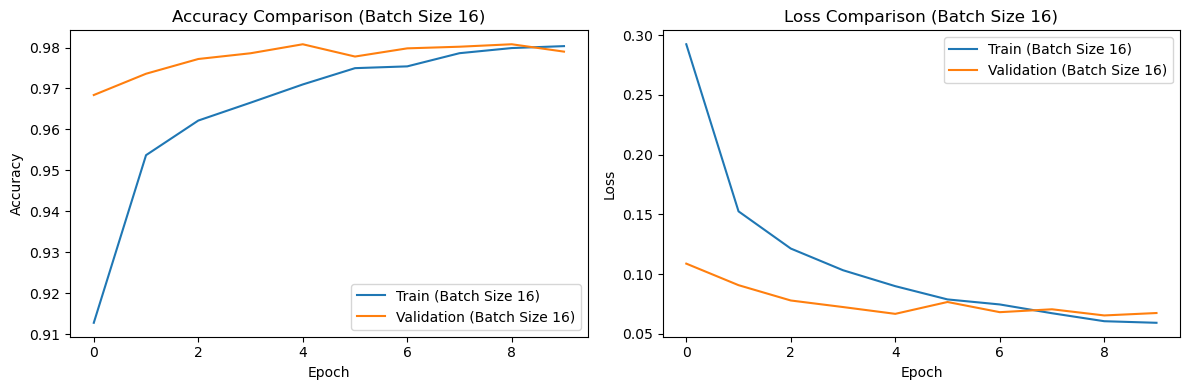

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2623 - accuracy: 0.9252 - val_loss: 0.1108 - val_accuracy: 0.9658
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1171 - accuracy: 0.9650 - val_loss: 0.0947 - val_accuracy: 0.9702
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0882 - accuracy: 0.9723 - val_loss: 0.0781 - val_accuracy: 0.9764
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0701 - accuracy: 0.9778 - val_loss: 0.0775 - val_accuracy: 0.9768
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0608 - accuracy: 0.9805 - val_loss: 0.0695 - val_accuracy: 0.9788
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0520 - accuracy: 0.9830 - val_loss: 0.0700 - val_accuracy: 0.9806
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0491 - accuracy: 0.9834 - val_loss: 0.0652 - val_accuracy:

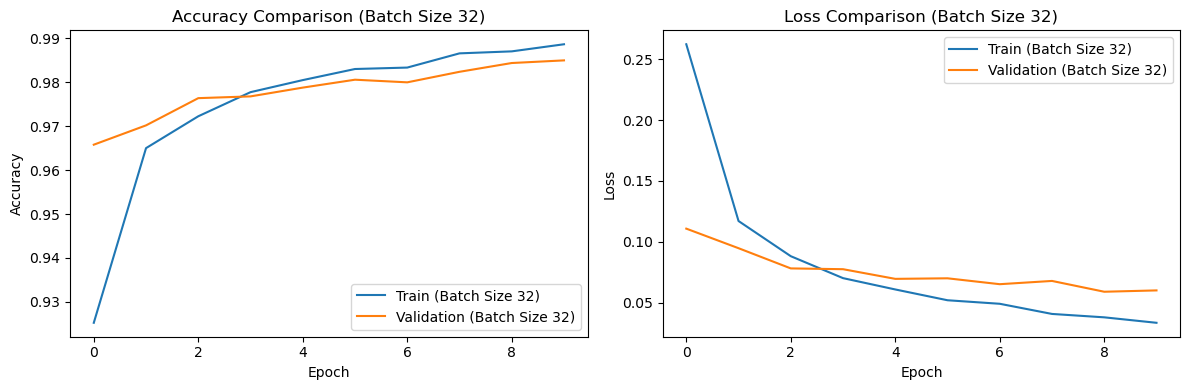

Epoch 1/10
860/860 [==============================] - 5s 4ms/step - loss: 0.2685 - accuracy: 0.9253 - val_loss: 0.1144 - val_accuracy: 0.9650
Epoch 2/10
860/860 [==============================] - 4s 4ms/step - loss: 0.1064 - accuracy: 0.9678 - val_loss: 0.0976 - val_accuracy: 0.9730
Epoch 3/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0731 - accuracy: 0.9776 - val_loss: 0.0797 - val_accuracy: 0.9770
Epoch 4/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0576 - accuracy: 0.9820 - val_loss: 0.0774 - val_accuracy: 0.9756
Epoch 5/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0449 - accuracy: 0.9856 - val_loss: 0.0869 - val_accuracy: 0.9762
Epoch 6/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0395 - accuracy: 0.9872 - val_loss: 0.0760 - val_accuracy: 0.9772
Epoch 7/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0329 - accuracy: 0.9894 - val_loss: 0.0765 - val_accuracy: 0.9778
Epoch 

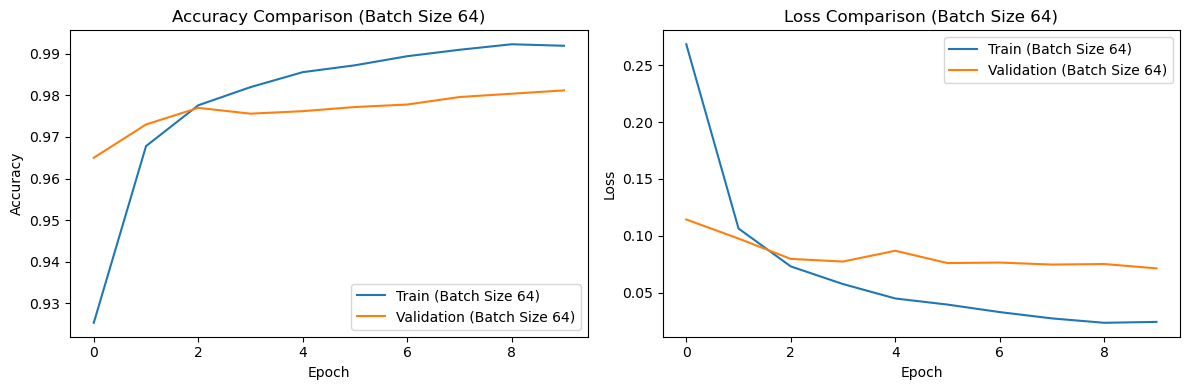

Epoch 1/10
430/430 [==============================] - 4s 6ms/step - loss: 0.3055 - accuracy: 0.9167 - val_loss: 0.1339 - val_accuracy: 0.9640
Epoch 2/10
430/430 [==============================] - 2s 5ms/step - loss: 0.1104 - accuracy: 0.9678 - val_loss: 0.1022 - val_accuracy: 0.9710
Epoch 3/10
430/430 [==============================] - 2s 5ms/step - loss: 0.0712 - accuracy: 0.9796 - val_loss: 0.0867 - val_accuracy: 0.9744
Epoch 4/10
430/430 [==============================] - 2s 5ms/step - loss: 0.0519 - accuracy: 0.9847 - val_loss: 0.0816 - val_accuracy: 0.9750
Epoch 5/10
430/430 [==============================] - 2s 5ms/step - loss: 0.0388 - accuracy: 0.9884 - val_loss: 0.0736 - val_accuracy: 0.9784
Epoch 6/10
430/430 [==============================] - 2s 5ms/step - loss: 0.0312 - accuracy: 0.9907 - val_loss: 0.0879 - val_accuracy: 0.9752
Epoch 7/10
430/430 [==============================] - 2s 5ms/step - loss: 0.0239 - accuracy: 0.9928 - val_loss: 0.0794 - val_accuracy: 0.9760
Epoch 

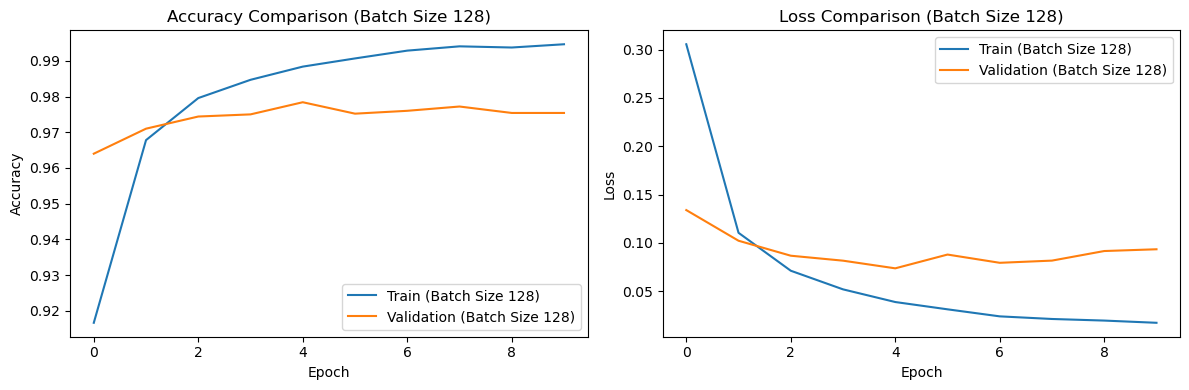

Epoch 1/10
215/215 [==============================] - 3s 8ms/step - loss: 0.3935 - accuracy: 0.8976 - val_loss: 0.2143 - val_accuracy: 0.9548
Epoch 2/10
215/215 [==============================] - 1s 6ms/step - loss: 0.1299 - accuracy: 0.9641 - val_loss: 0.1208 - val_accuracy: 0.9672
Epoch 3/10
215/215 [==============================] - 2s 7ms/step - loss: 0.0814 - accuracy: 0.9772 - val_loss: 0.0924 - val_accuracy: 0.9746
Epoch 4/10
215/215 [==============================] - 1s 6ms/step - loss: 0.0573 - accuracy: 0.9842 - val_loss: 0.0850 - val_accuracy: 0.9724
Epoch 5/10
215/215 [==============================] - 1s 6ms/step - loss: 0.0421 - accuracy: 0.9885 - val_loss: 0.0799 - val_accuracy: 0.9754
Epoch 6/10
215/215 [==============================] - 1s 6ms/step - loss: 0.0298 - accuracy: 0.9924 - val_loss: 0.0749 - val_accuracy: 0.9782
Epoch 7/10
215/215 [==============================] - 1s 6ms/step - loss: 0.0234 - accuracy: 0.9942 - val_loss: 0.0787 - val_accuracy: 0.9758
Epoch 

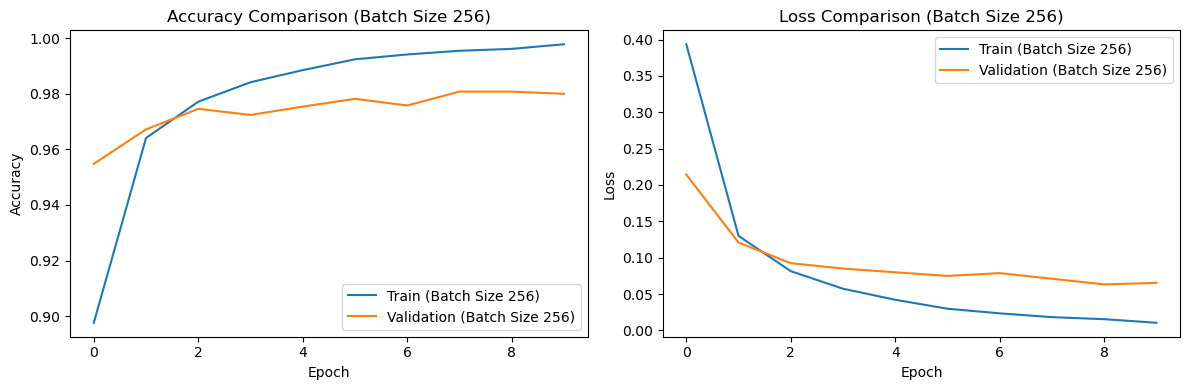

In [9]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset (same as before)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)
val_images = train_images[:5000]
val_labels = train_labels[:5000]
train_images = train_images[5000:]
train_labels = train_labels[5000:]

batch_sizes = [16, 32, 64, 128, 256]

for batch_size in batch_sizes:
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(128))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dense(64))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=10, batch_size=batch_size, validation_data=(val_images, val_labels))
    
    plt.figure(figsize=(12, 4))

    # Accuracy Comparison
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train (Batch Size ' + str(batch_size) + ')')
    plt.plot(history.history['val_accuracy'], label='Validation (Batch Size ' + str(batch_size) + ')')
    plt.title('Accuracy Comparison (Batch Size ' + str(batch_size) + ')')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Comparison
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train (Batch Size ' + str(batch_size) + ')')
    plt.plot(history.history['val_loss'], label='Validation (Batch Size ' + str(batch_size) + ')')
    plt.title('Loss Comparison (Batch Size ' + str(batch_size) + ')')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


Batch normalization offers several advantages for improving the training of neural networks, but it's important to consider potential limitations as well. Let's delve into both aspects:

**Advantages of Batch Normalization:**

1. **Accelerated Convergence:** Batch normalization helps neural networks converge faster during training. By maintaining consistent input distributions across layers, gradients flow more smoothly, reducing the vanishing/exploding gradient problem and enabling quicker updates to network weights.

2. **Higher Learning Rates:** Batch normalization allows for larger learning rates without destabilizing training. This speeds up learning, as larger learning rates can lead to faster convergence to the optimal solution.

3. **Stability:** Batch normalization improves the stability of neural network training. The normalization process makes networks less sensitive to the initialization of weights and biases, which can lead to more consistent and reliable training results.

4. **Regularization Effect:** Batch normalization acts as a form of regularization, reducing the need for dropout or other regularization techniques. It adds noise to the activations, preventing overfitting and improving the network's generalization to unseen data.

5. **Reduction of Internal Covariate Shift:** Batch normalization mitigates the problem of internal covariate shift, maintaining consistent distributions of inputs and facilitating the training process.

6. **Easier Hyperparameter Tuning:** Models with batch normalization tend to be more robust to hyperparameter choices, such as learning rate and weight initialization. This simplifies the process of hyperparameter tuning.

**Limitations and Considerations:**

1. **Dependency on Mini-Batch Size:** Batch normalization relies on mini-batch statistics (mean and variance) during training. Smaller batch sizes might lead to inaccurate statistics and suboptimal performance.

2. **Inference-time Behavior:** During inference, batch normalization requires statistics from a single data point. This can be problematic for tasks like online learning or real-time applications. Techniques like running statistics accumulation are used to address this.

3. **Increased Computational Cost:** Batch normalization introduces additional computations, including calculating mean and variance per batch. While modern hardware accelerates these operations, it can still increase training time.

4. **Susceptibility to Small Batch Effects:** Very small batch sizes (e.g., 2 or 4) might lead to unstable training due to the noise introduced by batch normalization.

5. **Hyperparameter Sensitivity:** Although batch normalization provides some level of insensitivity to hyperparameters, tuning the parameters of batch normalization layers (gamma and beta) can be important for optimal performance.

6. **Context Dependency:** Batch normalization might not be equally effective for all tasks or architectures. It's worth experimenting and observing the effects for specific problems.